In [16]:
from esgflib.data.datasets import get_melbourne_data
import matplotlib.pyplot as plt

In [2]:
# Download the melbourne data
melbourne_dataset = get_melbourne_data()

In [7]:
# See columns
melbourne_dataset.columns

Index(['Date', 'Temp'], dtype='object')

In [3]:
# First rows
melbourne_dataset.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
# Types of variables
melbourne_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [5]:
# Statistics over the temperature variable
melbourne_dataset.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [11]:
# Shape of the data
melbourne_dataset.shape

(3650, 2)

In [8]:
# Index by time
melbourne_dataset.set_index('Date', inplace=True)

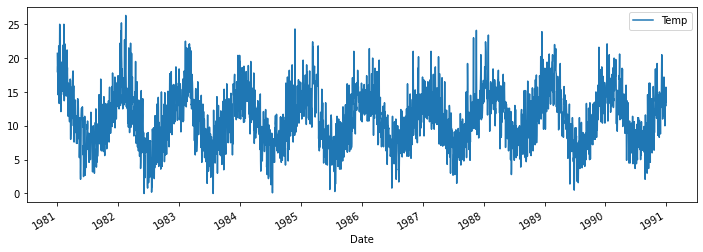

In [83]:
# Trace temperature evolution through time
melbourne_dataset.plot(figsize=(12,4));

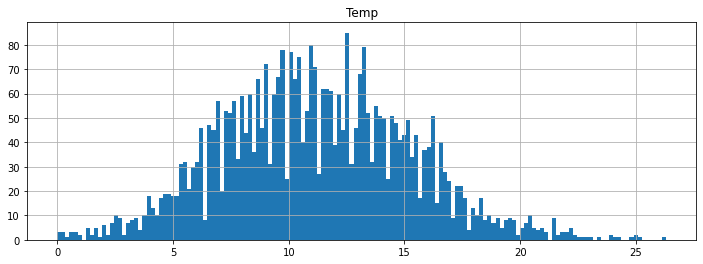

In [82]:
# See flat temperature variable as gaussian distribution
melbourne_dataset.hist(bins=150, figsize=(12,4));

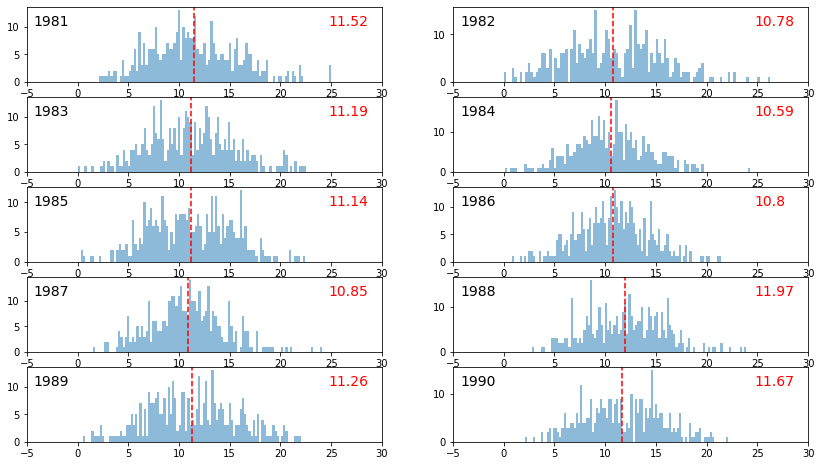

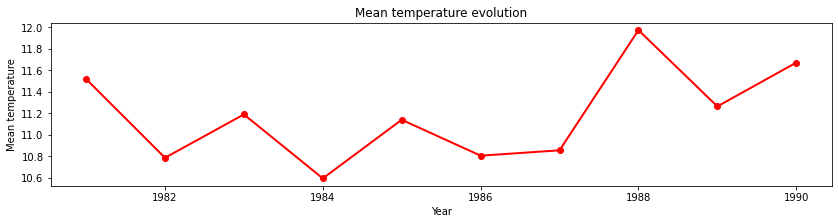

In [80]:
# Display annual distribution of the temperature
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(14, 8));
# Browse years
for i, year in enumerate(range(1981, 1991)):
    # Current axis
    axis = ax[int(i/2),i%2]
    axis.set_xlim((-5, 30))
    axis_transform = axis.transAxes
    # Mean of temperature for the year
    mean_temp = melbourne_dataset.loc[str(year)]['Temp'].mean()
    # Plot temperature distribution
    axis.hist(melbourne_dataset.loc[str(year)], bins=100, alpha=0.5, label=year);
    # Plot mean temperature
    axis.axvline(x=mean_temp, color='r', linestyle='--', label='mean');
    # Add textual informations
    axis.text(0.02, 0.90, str(year), transform=axis_transform, fontsize=14, verticalalignment='top');
    axis.text(0.85, 0.90, str(round(mean_temp, 2)), transform=axis_transform, fontsize=14, verticalalignment='top', color='r');

# Plot evolution of the mean temperature
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 3));
ax.plot(range(1981, 1991), [melbourne_dataset.loc[str(year)]['Temp'].mean() for year in range(1981, 1991)], '-o', color='r', linewidth=2);
ax.set_xlabel('Year');
ax.set_ylabel('Mean temperature');
ax.set_title('Mean temperature evolution');